In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
dataset = datasets.load_breast_cancer()
print(dataset.feature_names)
print(dataset.target_names)
print(dataset.data.shape)
print(dataset.target.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)
(569,)


In [7]:
kmeans = KMeans(n_clusters=10, random_state=68)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape

[1 1 8 5 8 0 8 7 0 0 3 3 3 7 0 7 7 3 9 0 0 2 7 9 1 3 7 8 3 3 8 0 3 1 3 3 0
 5 0 0 0 5 8 7 0 8 2 0 5 0 5 0 5 3 7 5 1 7 0 2 2 2 7 2 7 7 2 5 2 5 1 2 8 0
 5 3 0 8 8 0 5 0 4 3 5 8 7 8 5 7 7 7 0 0 7 1 5 2 5 7 7 2 5 2 2 0 5 5 9 5 2
 5 0 2 2 5 2 7 3 3 5 8 9 0 0 0 7 8 0 8 5 3 3 7 8 0 5 5 7 5 2 3 5 0 2 5 5 7
 0 0 0 2 2 5 0 5 3 7 5 5 5 8 9 5 9 7 2 3 8 7 5 7 7 2 2 2 2 7 0 5 4 1 3 5 7
 2 3 5 5 5 0 5 2 0 7 5 0 3 8 7 5 3 9 7 0 7 2 3 0 7 8 5 4 3 0 0 5 2 1 9 0 0
 2 7 0 7 2 7 0 0 3 5 5 1 2 0 4 1 0 3 0 5 5 0 8 2 0 0 5 5 1 5 1 3 1 7 1 7 3
 7 1 3 3 7 3 4 2 0 5 2 0 5 9 2 3 5 5 3 0 0 8 5 8 7 5 5 5 5 5 5 0 7 5 5 5 0
 2 5 7 2 1 5 8 2 5 5 0 2 0 0 5 7 0 5 2 5 5 8 2 5 2 8 5 1 5 5 0 5 3 7 7 0 5
 5 5 3 5 1 2 4 7 2 5 8 5 2 5 7 5 5 5 7 4 7 5 5 5 0 2 2 5 0 5 7 0 1 8 5 4 9
 3 7 8 1 0 7 2 0 0 5 5 5 5 5 0 0 5 0 5 3 2 2 3 9 5 0 0 5 5 5 3 5 0 5 5 5 7
 0 3 5 5 5 2 7 7 5 2 8 5 5 5 7 5 0 2 2 2 5 2 5 7 5 8 8 0 7 0 0 0 0 5 3 0 2
 3 5 3 7 7 1 5 8 5 0 0 0 5 0 0 2 8 6 0 5 0 0 0 2 3 5 2 5 7 5 2 5 7 0 5 7 5
 7 0 0 7 5 7 8 5 3 5 3 3 

(10, 30)

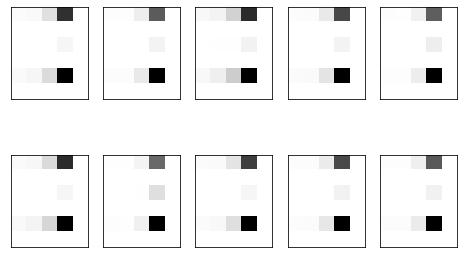

In [8]:
# Scatter plot of the data points
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 5))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [9]:

import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.8875219683655536

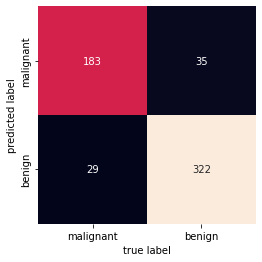

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');